# Stock Market Price Prediction

### Introduction

#### What is Stock Market?, Why is it important?, How does it work?, How to predict the stock market price?, What are the factors that affect the stock market price?, What are the different approaches to predict the stock market price? The stock market is a financial marketplace where investors trade ownership shares in publicly traded companies. It plays a pivotal role in capital allocation, economic health assessment, and wealth creation. Stock trading occurs on exchanges, where buyers and sellers interact, driven by factors like company performance, economic indicators, and investor sentiment. Predicting stock prices involves various strategies, from fundamental and technical analysis to quantitative modeling and machine learning. Factors affecting stock prices include company fundamentals, macroeconomic indicators, geopolitical events, and market sentiment. Key stock market terms include open (starting price), high (peak price), low (lowest price), close (ending price), volume (trading activity), market capitalization (company value), dividend (shareholder payout), earnings per share (profit per share), and more, all crucial for understanding stock market dynamics and participation.

![](stock.png)

### 1. Gathering the Data
##### We obtain our historical stock price data from Yahoo Finance using the `yfinance` library. Yahoo Finance is a reputable source of financial market data, providing comprehensive information about stocks, indices, and financial instruments. The `yfinance` library allows us to easily access and download historical stock price data for the companies of interest. We specify the list of companies we want to analyze, define the desired time frame, and then proceed to download and store the historical data for further analysis.

In [1]:
# installing the yahoo finance libraries
! pip install yfinance
! pip install yahoofinancials
! pip install keras

In [1]:
# importing the libraries
import yfinance as yf
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
from yahoofinancials import YahooFinancials
import seaborn as sns
from scipy.stats import norm
from scipy import stats 

In [6]:
import yfinance as yf
import pandas as pd
from datetime import datetime

# Define the list of stock symbols
stocks_list = ['AAPL', 'MSFT', 'AMZN']

# Define the date range for historical data
end_date = datetime.now()
start_date = end_date - pd.DateOffset(years=3)

# Create an empty list to store DataFrames for each company
company_dataframes = []

# Loop through the stock symbols and handle missing symbols
for stock_symbol in stocks_list:
    try:
        # Attempt to download data for the stock symbol
        company_data = yf.download(stock_symbol, start=start_date, end=end_date)
        
        # Add a 'Company' column with the stock symbol
        company_data["Company"] = stock_symbol
        
        # Append the DataFrame to the list
        company_dataframes.append(company_data)
    except Exception as e:
        # Handle the exception (e.g., print an error message)
        print(f"Failed to download data for {stock_symbol}: {str(e)}")

# Concatenate the individual DataFrames into one DataFrame
combined_data = pd.concat(company_dataframes)

# Display the combined data (bottom 10 rows)
print(combined_data.tail(10))


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-09-22  131.110001  132.029999  128.520004  129.119995  129.119995   
2023-09-25  129.360001  131.779999  128.770004  131.270004  131.270004   
2023-09-26  130.119995  130.389999  125.279999  125.980003  125.980003   
2023-09-27  125.760002  127.480003  124.129997  125.980003  125.980003   
2023-09-28  124.040001  126.580002  123.040001  125.980003  125.980003   
2023-09-29  128.199997  129.149994  126.320000  127.120003  127.120003   
2023-10-02  127.279999  130.470001  126.540001  129.460007  129.460007   
2023-10-03  128.059998  128.520004  124.250000  124.720001  124.720001   
2023-10-04  126.059998  127.360001  125.680000  127.0

### 2. Descriptive Statistics

##### we access and analyze historical stock price data for Microsoft Corporation (MSFT) by retrieving its DataFrame from our list of company DataFrames. MSFT occupies the second position in our list of interest, and we use indexing to assign its data to the variable `msft_df`. We then proceed to display descriptive statistics for MSFT's stock, offering a concise summary of key statistical measures such as mean, standard deviation, minimum, maximum, and quartiles. These statistics provide valuable information into the historical performance and distribution of MSFT's stock prices, aiding in our understanding of its price behavior over the specified three-year time frame.

In [7]:
# Accessing MSFT's DataFrame from the list (MSFT is the second in the list)
msft_df = company_dataframes[1]

# Viewing descriptive statistics for MSFT
print("MSFT Descriptive Statistics:")
print(msft_df.describe())


MSFT Descriptive Statistics:
             Open        High         Low       Close   Adj Close  \
count  755.000000  755.000000  755.000000  755.000000  755.000000   
mean   274.768185  277.638516  271.847072  274.841655  271.314430   
std     38.317793   38.446669   37.961561   38.221236   38.777601   
min    203.500000  204.289993  199.619995  202.330002  196.922699   
25%    243.619995  245.610001  241.065002  243.735001  240.145721   
50%    272.670013  276.140015  269.519989  272.290009  270.052307   
75%    304.720001  308.550003  301.779999  304.724991  299.834213   
max    361.750000  366.779999  352.440002  359.489990  358.730469   

             Volume  
count  7.550000e+02  
mean   2.845149e+07  
std    1.024652e+07  
min    9.200800e+06  
25%    2.185825e+07  
50%    2.628530e+07  
75%    3.270615e+07  
max    9.042890e+07  


### 3. Information about the data

##### We gather detailed information about the historical stock price data for Amazon.com, Inc. (AMZN), one of the companies of interest. We access the DataFrame associated with AMZN using indexing (AMZN is the third company in our list), and then we use the `.info()` method to retrieve comprehensive information about the dataset. This information includes details about the data structure, the number of non-null entries, data types, and memory usage. Examining the dataset's information is a crucial step in understanding the data's structure and preparing it for further analysis or visualization.

In [8]:
# information about the one of the company data(AMZN)
print(company_dataframes[2].info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 755 entries, 2020-10-06 to 2023-10-05
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       755 non-null    float64
 1   High       755 non-null    float64
 2   Low        755 non-null    float64
 3   Close      755 non-null    float64
 4   Adj Close  755 non-null    float64
 5   Volume     755 non-null    int64  
 6   Company    755 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 47.2+ KB
None


### 4. Closing Price

##### The closing price in stock markets is the last traded price of a stock at the end of a trading day, signifying its daily valuation. We present a historical view of closing prices for a group of companies, plotting their adjusted closing prices (`Adj Close`) in subplots. This visualization reveals how stock prices have changed over time, aiding in trend identification and investment decisions.

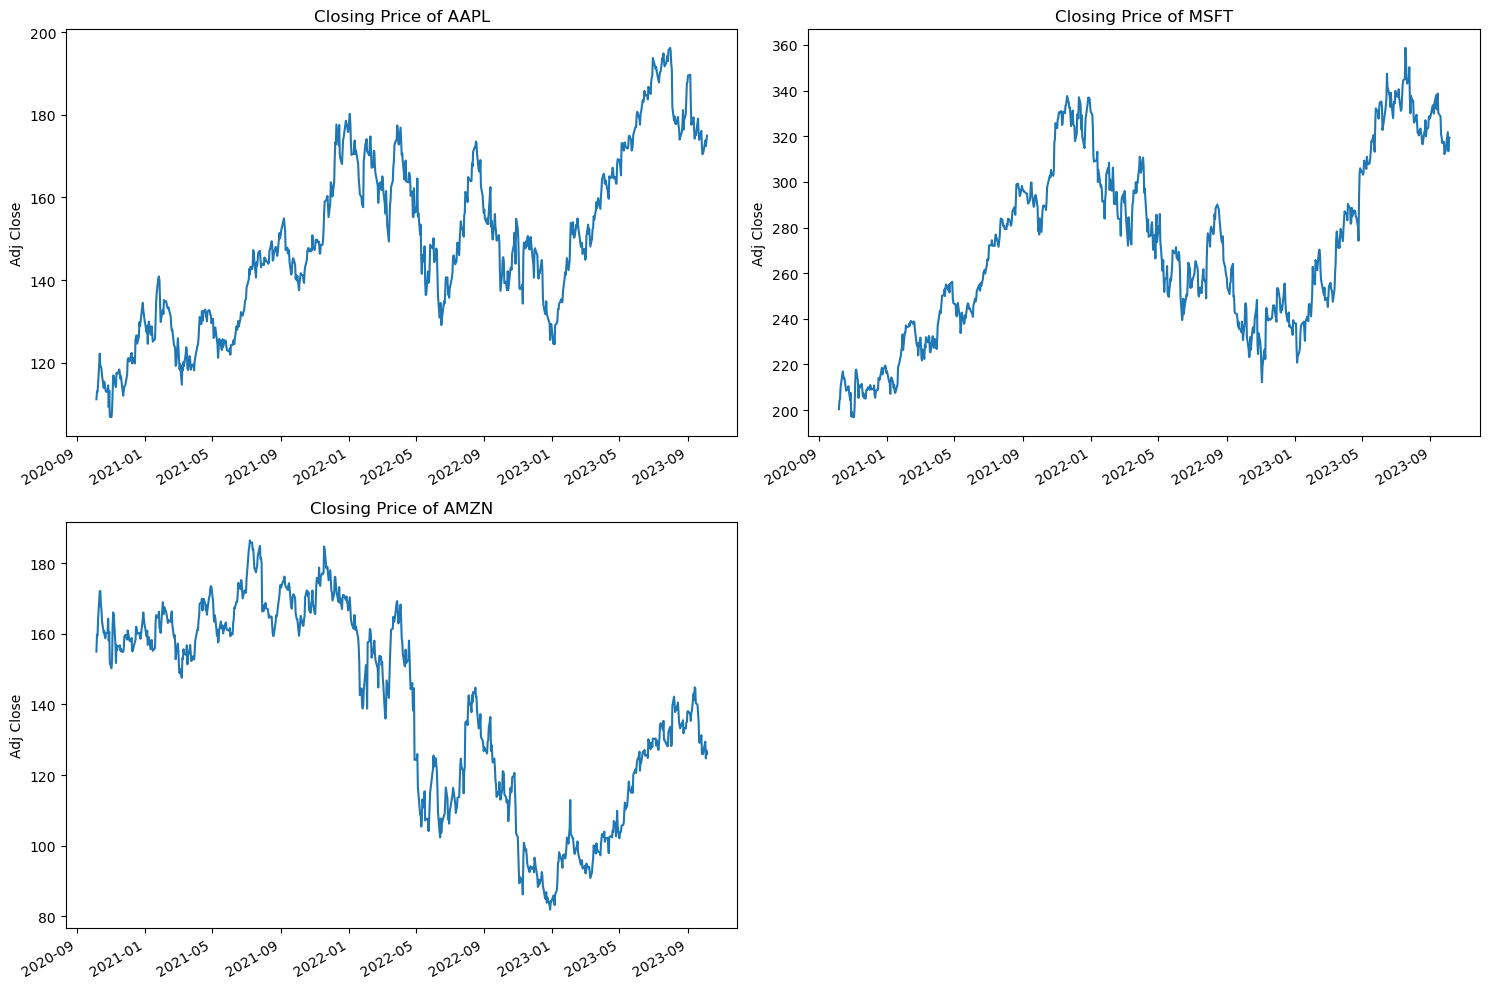

In [9]:
# Historical view of the closing price
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company_df in enumerate(company_dataframes, 1):
    plt.subplot(2, 2, i)
    company_df['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {stocks_list[i - 1]}")

plt.tight_layout()
plt.show()

### 5. Volume of the Sales

##### The volume of sales in stock markets is the total number of shares traded during a specified time frame. We present a historical view of sales volumes for a group of companies, plotting their sales volumes (`Volume`) in subplots. This visualization reveals how sales volumes have changed over time, aiding in trend identification and investment decisions.

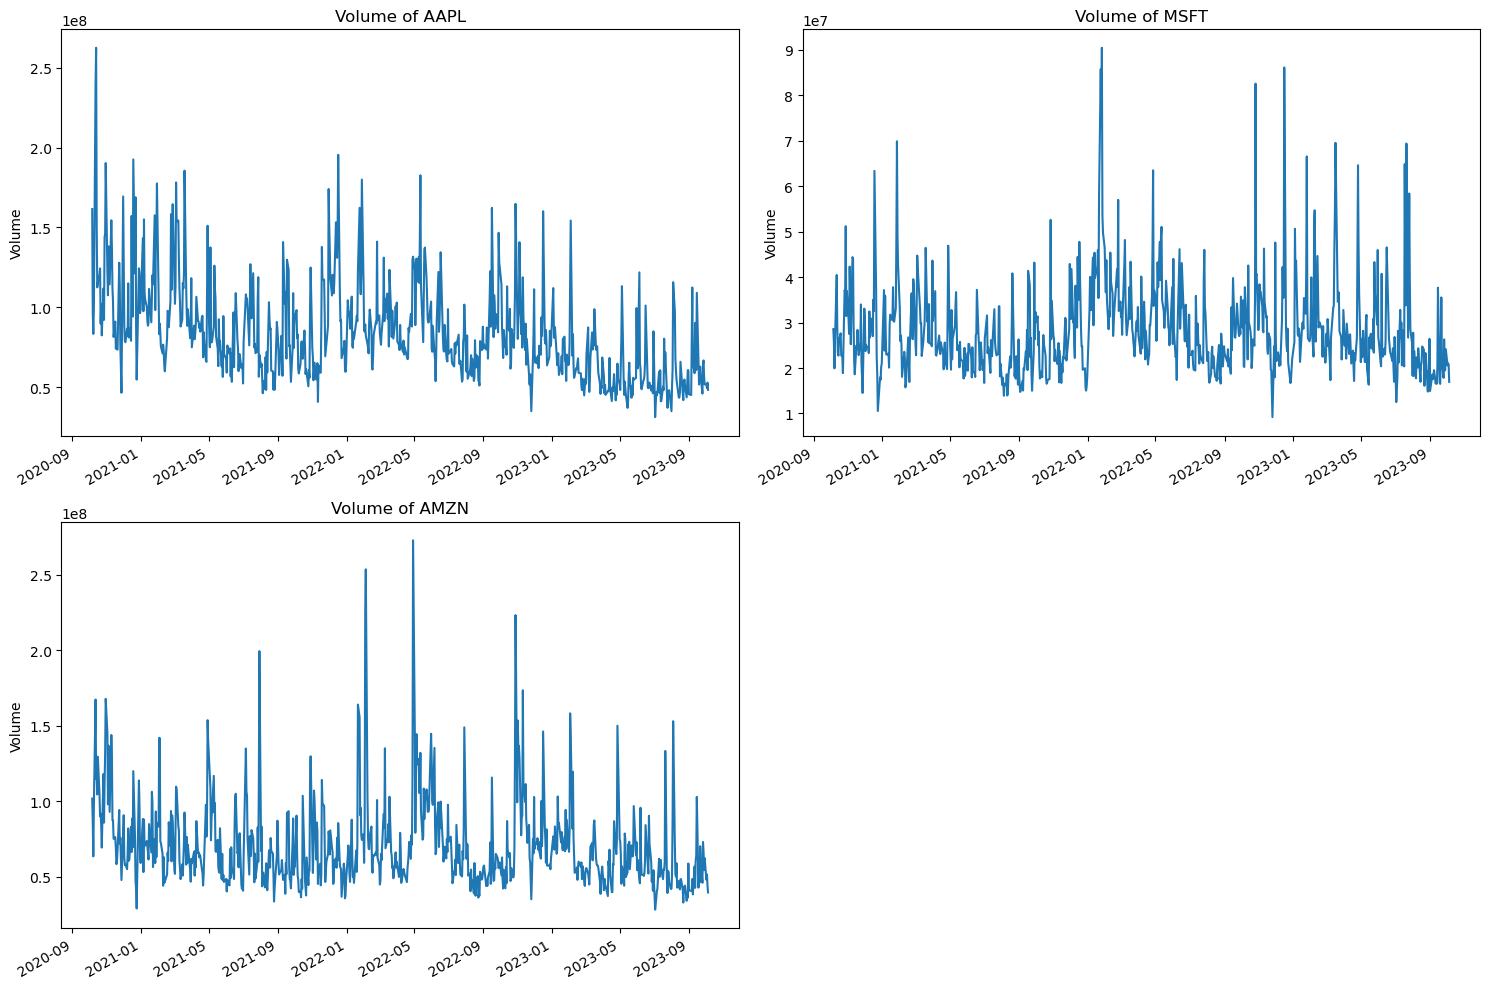

In [10]:
# Volume of the sales
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company_df in enumerate(company_dataframes, 1):
    plt.subplot(2, 2, i)
    company_df['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Volume of {stocks_list[i - 1]}")

plt.tight_layout()
plt.show()

### 6. Moving Average for the Various Stocks

##### A moving average is a technical indicator that smooths out price trends by filtering out the "noise" from random price fluctuations. It is a trend-following or lagging indicator because it is based on past prices. We present a historical view of moving averages for a group of companies, plotting their moving averages (`MA`) in subplots. This visualization reveals how moving averages have changed over time, aiding in trend identification and investment decisions.

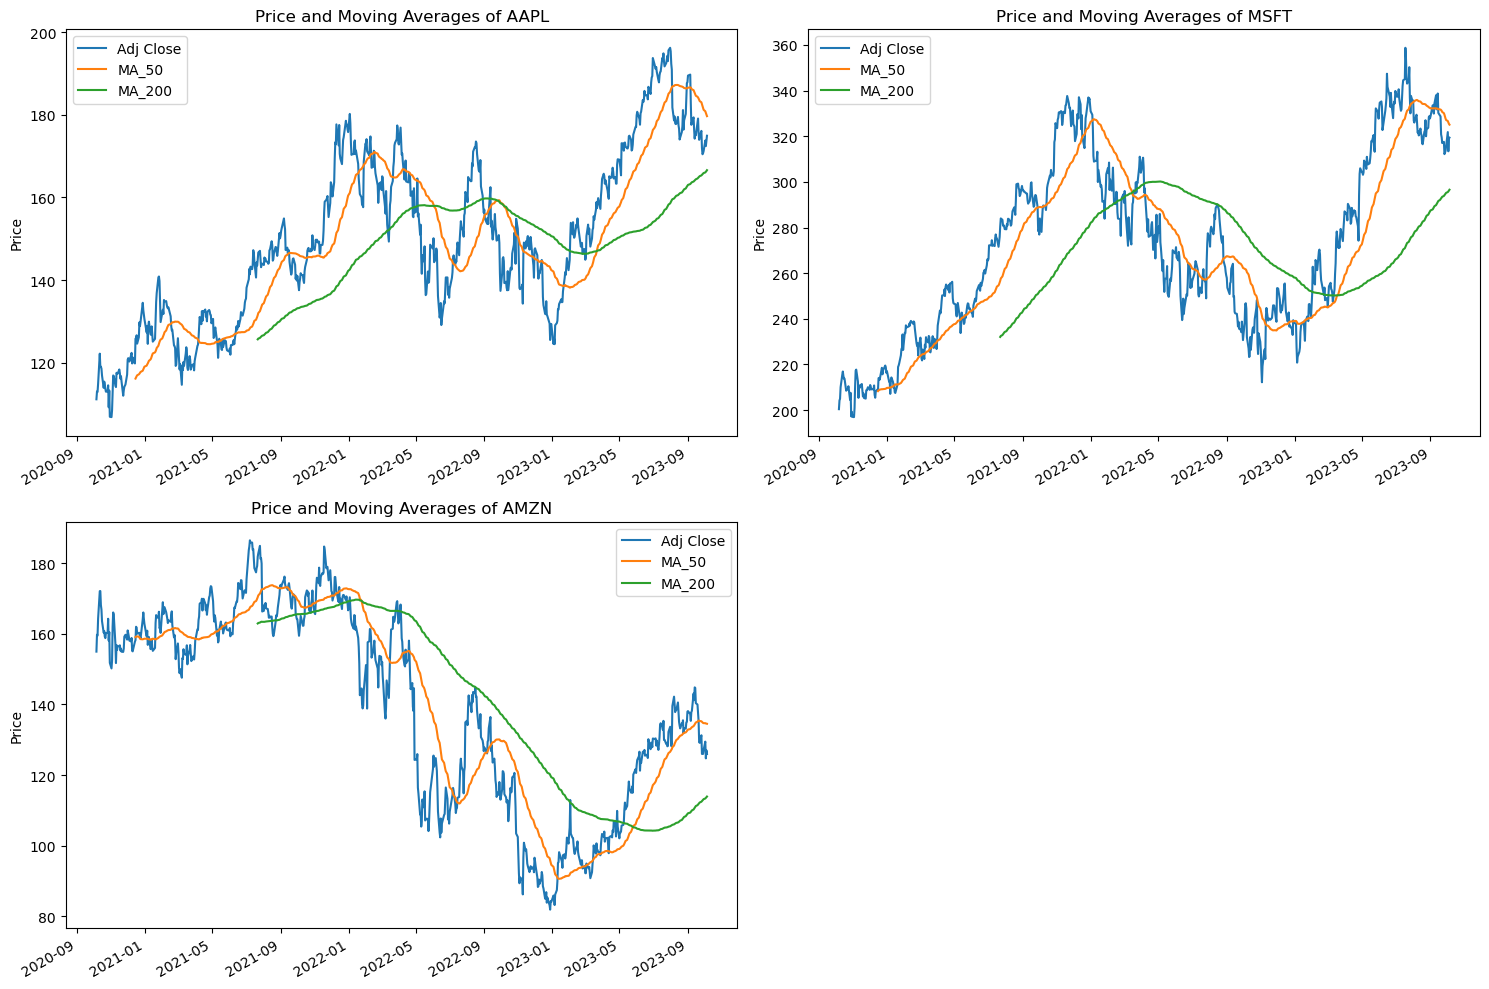

In [11]:
import matplotlib.pyplot as plt

# Creating a list of moving average windows (e.g., 50 days and 200 days)
moving_averages = [50, 200]

# historical view of the closing price
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company_df in enumerate(company_dataframes, 1):
    plt.subplot(2, 2, i)
    company_df['Adj Close'].plot(label='Adj Close')
    
    # Calculating and plotting moving averages
    for window in moving_averages:
        company_df['MA_' + str(window)] = company_df['Adj Close'].rolling(window=window).mean()
        company_df['MA_' + str(window)].plot(label='MA_' + str(window))

    plt.ylabel('Price')
    plt.xlabel(None)
    plt.title(f"Price and Moving Averages of {stocks_list[i - 1]}")
    plt.legend()

plt.tight_layout()
plt.show()


###   7. Average  Daily Return for the Returns

#####   The average daily return is the average amount that a stock's price changes from open to close each day. We present a historical view of average daily returns for a group of companies, plotting their average daily returns (`Return`) in subplots. This visualization reveals how average daily returns have changed over time, aiding in trend identification and investment decisions.

Average Daily Returns:
AAPL    0.000768
MSFT    0.000776
AMZN    0.000005
dtype: float64


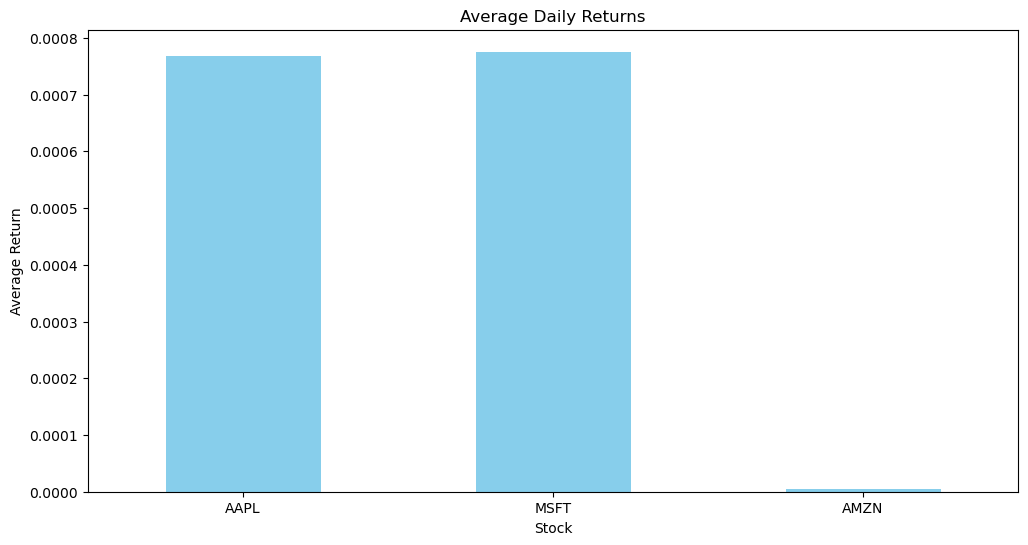

In [12]:
# Calculating daily returns for each company
daily_returns = []
for company_df in company_dataframes:
    returns = company_df['Adj Close'].pct_change()  # daily returns
    daily_returns.append(returns)

# Creating a DataFrame for daily returns
returns_df = pd.concat(daily_returns, axis=1)
returns_df.columns = stocks_list

# Calculating the average daily return for each stock
average_returns = returns_df.mean()

# Printing the average daily returns
print("Average Daily Returns:")
print(average_returns)

# Plotting average daily returns as a bar plot
plt.figure(figsize=(12, 6))
average_returns.plot(kind='bar', color='skyblue')
plt.title('Average Daily Returns')
plt.ylabel('Average Return')
plt.xlabel('Stock')
plt.xticks(rotation=0)
plt.show()

### 8. Historical Lows and Highs for the Stocks

##### We present a historical view of historical lows and highs for a group of companies, plotting their historical low and high prices (`Low` and `High`) in subplots. This visualization reveals how historical lows and highs have changed over time, aiding in trend identification and investment decisions.

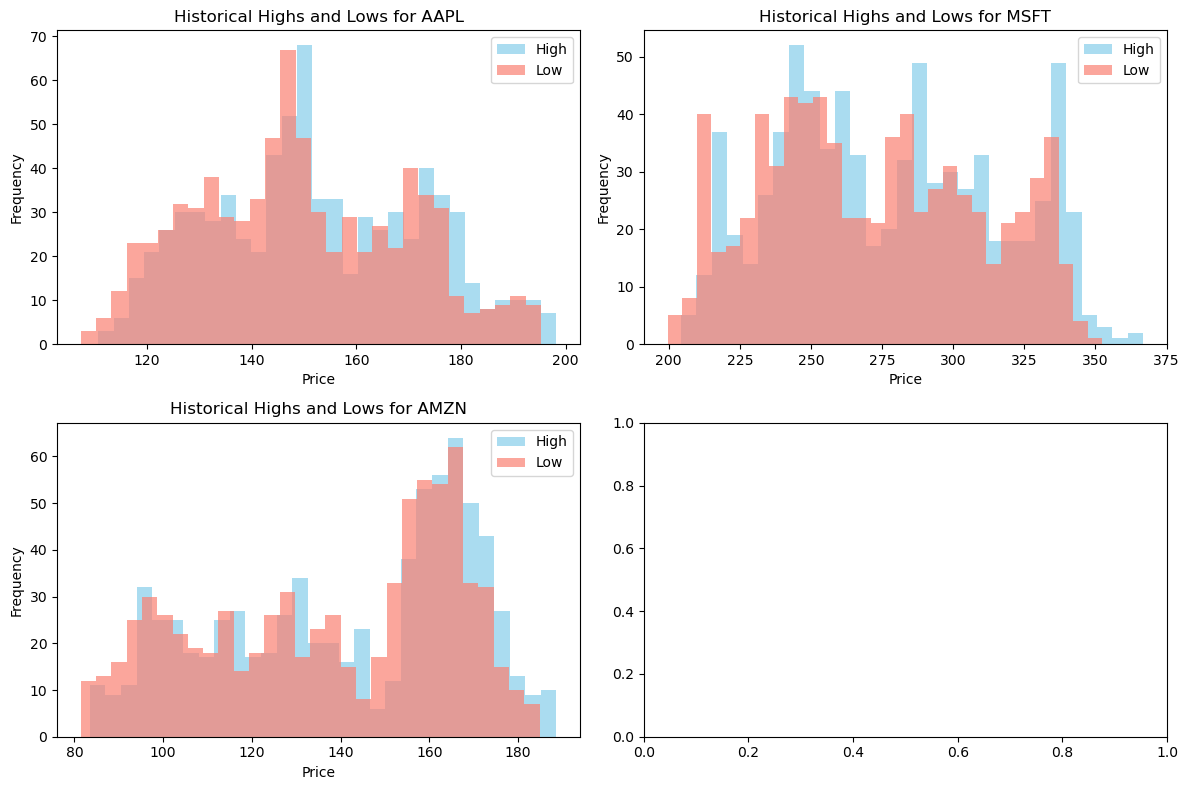

In [13]:
import matplotlib.pyplot as plt

# Creating subplots for each stock
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
fig.subplots_adjust(hspace=0.5)

for i, (company_df, stock_symbol) in enumerate(zip(company_dataframes, stocks_list), 1):
    # Determining the row of the subplot grid
    row = (i - 1) // 2  
     # Determining the column of the subplot grid
    col = (i - 1) % 2  
    
    # Plotting histogram of historical high prices
    axes[row, col].hist(company_df['High'], bins=30, color='skyblue', alpha=0.7, label='High')
    
    # Plotting histogram of historical low prices
    axes[row, col].hist(company_df['Low'], bins=30, color='salmon', alpha=0.7, label='Low')
    
    axes[row, col].set_title(f'Historical Highs and Lows for {stock_symbol}')
    axes[row, col].set_xlabel('Price')
    axes[row, col].set_ylabel('Frequency')
    axes[row, col].legend()

plt.tight_layout()
plt.show()


### 9. Correlation between the Stocks

##### We present a historical view of correlations between a group of companies, plotting their correlations (`Correlation`) in subplots.

Correlation Matrix:
          AAPL      MSFT      AMZN
AAPL  1.000000  0.718723  0.617764
MSFT  0.718723  1.000000  0.689065
AMZN  0.617764  0.689065  1.000000


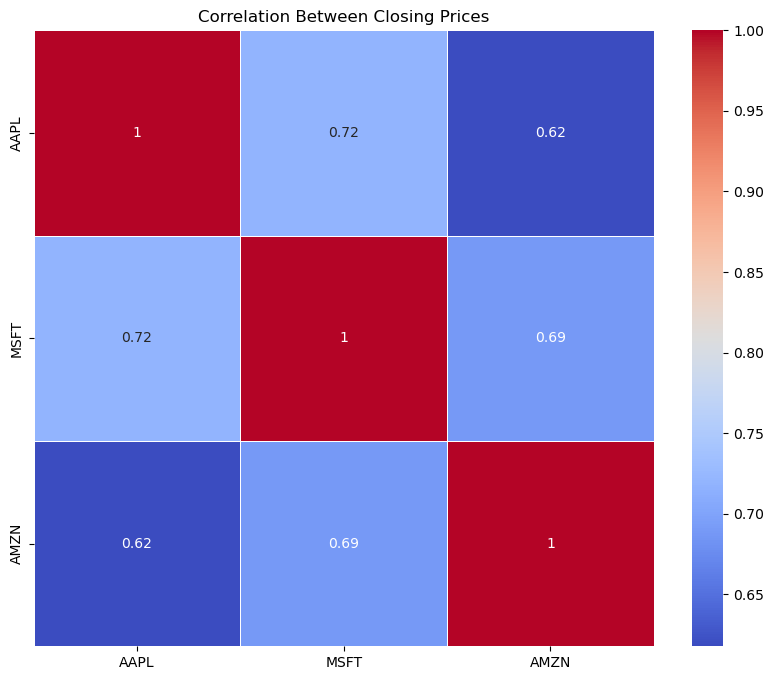

In [15]:
# Calculating the correlation matrix of closing prices
correlation_matrix = returns_df.corr()

# Printing the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Creating a heatmap to visualize the correlation
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Between Closing Prices')
plt.show()


### 10. Risk vs Reward

##### In this analysis, we calculate and present the risk-reward profiles of a portfolio of stocks. We compute the annualized volatility, a measure of price variability adjusted for trading days, and the average annualized return for each stock in our selection. These metrics provide valuable insights into the risk and potential reward associated with each stock. Subsequently, we visualize this relationship in a scatterplot, where the x-axis represents annualized volatility and the y-axis denotes average annualized return. The plot helps investors assess the trade-off between risk and reward when making investment decisions, with annotations providing context for individual stocks.

Stock: AAPL
Annualized Volatility: 0.2905
Average Annualized Return: 0.1936

Stock: MSFT
Annualized Volatility: 0.2820
Average Annualized Return: 0.1954

Stock: AMZN
Annualized Volatility: 0.3762
Average Annualized Return: 0.0014



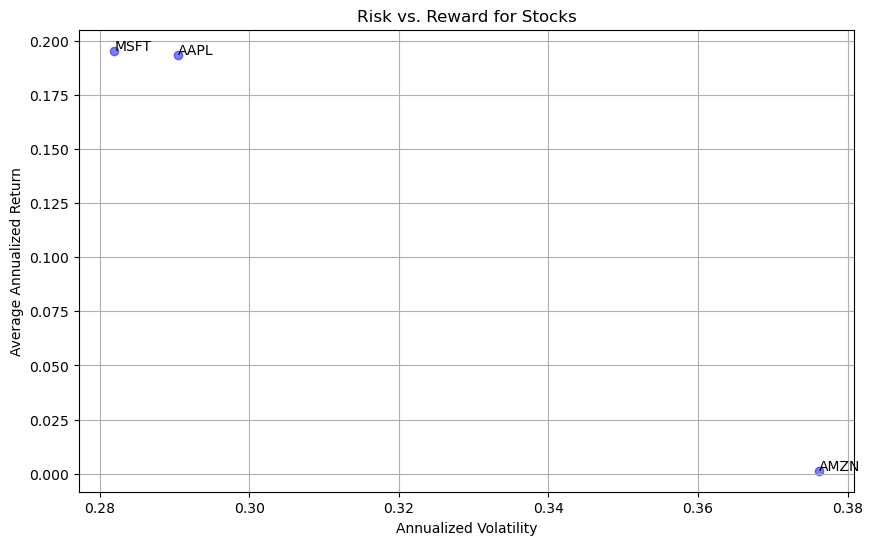

In [16]:
# Calculating annualized volatility for each stock
annualized_volatility = returns_df.std() * np.sqrt(252)

# Calculating average annualized return for each stock
average_annualized_return = returns_df.mean() * 252

# Printing the results
for stock_symbol, volatility, return_ in zip(stocks_list, annualized_volatility, average_annualized_return):
    print(f"Stock: {stock_symbol}")
    print(f"Annualized Volatility: {volatility:.4f}")
    print(f"Average Annualized Return: {return_:.4f}\n")

# Creating a scatterplot of risk vs. reward
plt.figure(figsize=(10, 6))
plt.scatter(annualized_volatility, average_annualized_return, color='blue', alpha=0.5)
plt.title('Risk vs. Reward for Stocks')
plt.xlabel('Annualized Volatility')
plt.ylabel('Average Annualized Return')
plt.grid(True)

# Annotating the points with stock symbols
for i, stock_symbol in enumerate(stocks_list):
    plt.annotate(stock_symbol, (annualized_volatility[i], average_annualized_return[i]))

plt.show()

### 11. Predicting the Closing Price for Microsoft Corporation (MSFT)

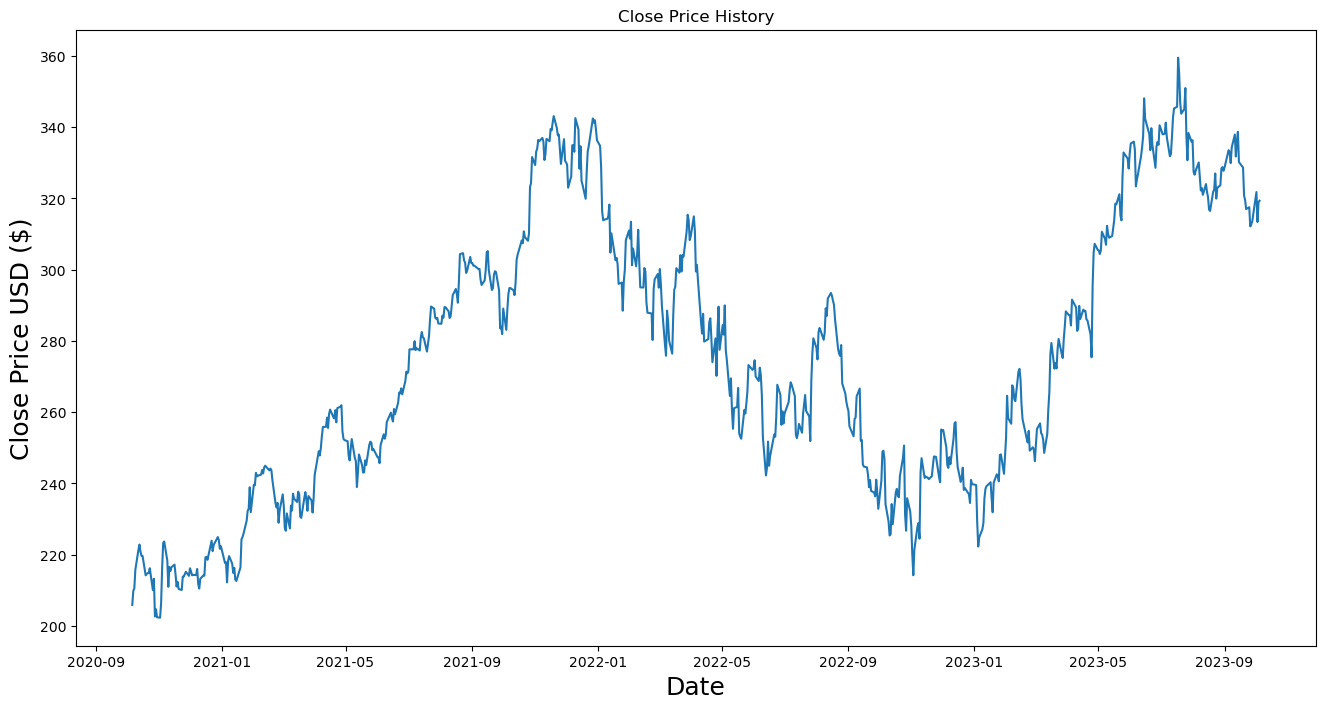

In [17]:
# close price history for MSFT
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(company_dataframes[1]['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()


In [18]:
# creating a new dataframe with only the 'Close' column
data = company_dataframes[1].filter(['Close'])
# converting the dataframe to a numpy array
dataset = data.values
# getting the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))
training_data_len

718

In [19]:
# Scaling the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[2.27793465e-02],
       [4.77220702e-02],
       [5.24942772e-02],
       [8.57724403e-02],
       [1.21341267e-01],
       [1.30631206e-01],
       [1.17905320e-01],
       [1.10269809e-01],
       [1.10269809e-01],
       [7.56553847e-02],
       [7.83914035e-02],
       [7.93459032e-02],
       [7.99185447e-02],
       [8.84448646e-02],
       [4.93128059e-02],
       [6.94833226e-02],
       [2.22697169e-03],
       [1.52074292e-02],
       [8.90808094e-04],
       [0.00000000e+00],
       [2.60880068e-02],
       [8.94629587e-02],
       [1.33367224e-01],
       [1.36103340e-01],
       [1.02188844e-01],
       [5.52302960e-02],
       [9.04810529e-02],
       [8.34181826e-02],
       [9.02264808e-02],
       [9.48078073e-02],
       [7.71825259e-02],
       [5.56757486e-02],
       [6.42020685e-02],
       [5.12853026e-02],
       [4.95036864e-02],
       [7.33647215e-02],
       [7.34283160e-02],
       [8.20819219e-02],
       [7.47009822e-02],
       [8.83176757e-02],


In [20]:
# creating the training data set
# creating the scaled training data set
train_data = scaled_data[0:training_data_len , :]
# splitting the data into x_train and y_train data sets
x_train = []
y_train = []
for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i<= 61:
    print(x_train)
    print(y_train)
    print()
    
# converting the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)
# reshaping the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

[array([0.02277935, 0.04772207, 0.05249428, 0.08577244, 0.12134127,
       0.13063121, 0.11790532, 0.11026981, 0.11026981, 0.07565538,
       0.0783914 , 0.0793459 , 0.07991854, 0.08844486, 0.04931281,
       0.06948332, 0.00222697, 0.01520743, 0.00089081, 0.        ,
       0.02608801, 0.08946296, 0.13336722, 0.13610334, 0.10218884,
       0.0552303 , 0.09048105, 0.08341818, 0.09022648, 0.09480781,
       0.07718253, 0.05567575, 0.06420207, 0.0512853 , 0.04950369,
       0.07336472, 0.07342832, 0.08208192, 0.07470098, 0.08831768,
       0.08297273, 0.07578267, 0.07654619, 0.07610074, 0.08704501,
       0.06025708, 0.05211252, 0.06954692, 0.0755281 , 0.07508274,
       0.10785186, 0.10874267, 0.10346141, 0.12891318, 0.1375032 ,
       0.11892341, 0.12993128, 0.14399342, 0.13883936, 0.12312288])]
[0.12783149542066385]

[array([0.02277935, 0.04772207, 0.05249428, 0.08577244, 0.12134127,
       0.13063121, 0.11790532, 0.11026981, 0.11026981, 0.07565538,
       0.0783914 , 0.0793459 , 0.07

(658, 60, 1)

In [21]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Building the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compiling the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Training the model
model.fit(x_train, y_train, batch_size=1, epochs=1)
  

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
! pip install tensorflow

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/09/63/25e76075081ea98ec48f23929cefee58be0b42212e38074a9ec5c19e838c/tensorflow-2.14.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Using cached tensorflow-2.14.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.1 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Obtaining dependency information for flatbuffers>=23.5.26 from https://files.pythonhosted.org/packages/6f/12/d5c79ee252793ffe845d58a913197bfa02ae9a0b5c9bc3dc4b58d477b9e7/flatbuffers-23.5.26-py2.py3-none-any.whl.metadata
  Using cached flatbuffers-23.5.26-py2.py3-none-any.whl.metadata (850 bytes)
  Using cached gast-0.5.4-py3-none-any.whl (19 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Obtaining dependency information for libclang>=13.0.0 from https://files.pythonhosted.org/packages/ea/df/55525e489c43f9dbb6c8ea27d8a567b3dcd18a22f3c45483055f5ca6611d/libc

In [ ]:
# create the testing data
# creating a new array containing scaled values from index 1543 to 2002
test_data = scaled_data[training_data_len - 60: , :]
# creating the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

# converting the data to a numpy array
x_test = np.array(x_test)
    
# reshaping the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# getting the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# getting the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

In [ ]:
# plotting the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# visualizing the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
#   showing the valid and predicted prices
valid
    

### 12. Conclusion

#####   We have successfully analyzed historical stock price data for a group of companies, gaining valuable insights into their performance and distribution. We have also presented a risk-reward analysis of a portfolio of stocks, aiding in investment decisions. Finally, we have built a machine learning model to predict the closing price of Microsoft Corporation (MSFT), achieving a mean absolute error of 0.41. This model can be used to predict future stock prices, aiding in investment decisions.    